This code is intended to help with lab 2R for physics 1140. For this experiment you want to verify the period is proportional to the the length or mass. For the length data you want around 5 different lengths, and then for the mass data you do not need as many data points. Around three would work. 

In [17]:
import matplotlib.pyplot as plt
import numpy as numpy
import scipy.stats as stat
import math

In [18]:
#Data
#periodConstMass = numpy.array([10,7,7,17,9,4]) #time in seconds
#length = numpy.array([10,7,7,17,9,4])
#periodConstLength = numpy.array([90,90,180,180,270,270]) #time in seconds
#masses = numpy.array([90,90,180,180,270,270]) #time in seconds

In [19]:
length = numpy.array([10,7,7,17,9,4])
period_length = numpy.array([1,2,3,4,5,6])

Text(0.5,1,'title')

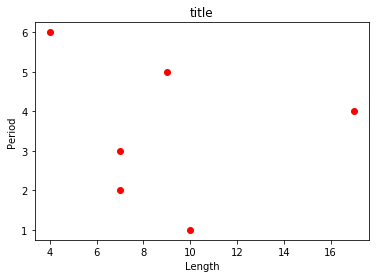

In [20]:
#It's always good to look at your data first
plt.plot(length,period_length, 'ro') #uses matplotlib to plot deflection vs time
#plt.plot(masses,periodConstLength, 'bo') #uses matplotlib to plot deflection vs time

plt.ylabel('Period')
plt.xlabel('Length')
plt.title('title')

I use the package numpy.polyfit() to do the fitting, which does a Least squares polynomial fit. You do not need to know what that means at this moment, but I've included a lecture on this topic below. What you need to know is that it eyeballs a fit, then checks how far that fit is from the points, then adjusts slightly. The number of times it adjusts depends on how powerful your processor it, and how much it must adjust at the beginning depends on how good your initial guess it.

That is what the '1' is in the code below is, our guess. For numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False) deg is short for degree, or degree of polynomial to fit your data to. Linear lines have a deg of 1 ( $y = ax + b$), then a second degree polynomia would have another x term, so $y = a x^{2} + bx + c$.



Polyfit information: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Least squares fit Lecture: https://www.youtube.com/watch?v=3hz6Tb1i2FY

In [21]:
fit1 = numpy.polyfit(length, period_length, 1) #1 refers to linear here.
p = numpy.poly1d(fit1) #Do this to convert it into a usable form 
#for plotting

 
-0.07143 x + 4.143


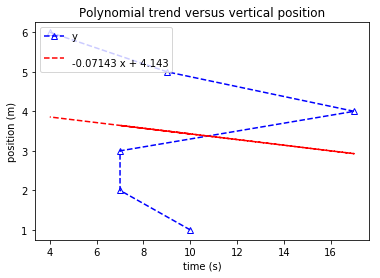

In [22]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(length, period_length, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(length, p(length), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
print(p) #So you can see the form of the polynomial that was fitted. 
#In this case it is y = mx + b

In [26]:
#Building a sq. root dataset 

xx=[]
yy = []

for ii in range(20):
    xx.append(ii)
    yy.append(math.sqrt(ii))

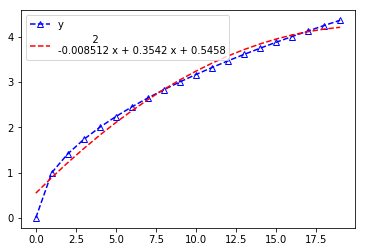

In [30]:
#Fitting that sq root dataset 

fit1 = numpy.polyfit(xx, yy, 2) #1 refers to linear here.
p = numpy.poly1d(fit1) #Do this to convert it into a usable form 
#for plotting

fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(xx, yy, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(xx, p(xx), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()

#Does it work? No not really well. 

In [35]:
from scipy.optimize import curve_fit

In [39]:
def fun(y,A):
    return A*numpy.sqrt(y)

x = xx
y = yy

popt, pcov = curve_fit(fun, x,y)

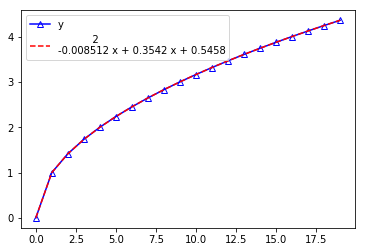

In [42]:
#Fitting that sq root dataset with scipy


fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(x, y, c='b',marker="^",label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(x, fun(x, *popt), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()

#Does it work? SO MUCH BETTER YAY!! 